In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import cvxpy as cp
import numpy as np
import plotly.graph_objects as go
import ast

---
# Gathering data for stock prices of 10 companies for the last 3 months
---

In [ ]:
def get_historical_data(tickers, start_date, end_date):
    data = {}  # to store all the data

    # Looping through all the companies to get/download the desired data
    for ticker in tickers:
        # fetching the company name in proper short format
        company_name = yf.Ticker(ticker).info['longName'].split()[0].strip(',')
        stock_data = yf.download(ticker, start=start_date, end=end_date)  # downloading the data
        data[company_name] = stock_data['Close']

    # Converting to a pandas dataframe
    data = pd.DataFrame(data)

    return data

In [ ]:
# Companies choosen -> Apple, Google, Microsoft, Amazon, Tesla, Meta, Nvidia, Paypal, Netflix, Visa
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'META', 'NVDA', 'PYPL', 'NFLX', 'V']

In [ ]:
time_period = 90  # 3 months = 90 days
end_date = datetime.today().strftime('%Y-%m-%d')  # Current timestamp
start_date = (datetime.today() - timedelta(days=time_period)).strftime('%Y-%m-%d')  # Start date will be 3 months before the current time stamp

In [ ]:
historical_data = get_historical_data(tickers, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
historical_data.head()

,Apple,Alphabet,Microsoft,Amazon.com,Tesla,Meta,NVIDIA,PayPal,Netflix,Visa
Date,,,,,,,,,,
2023-11-01,173.970001,126.449997,346.070007,137.000000,205.660004,311.850006,423.250000,51.660000,420.190002,238.580002
2023-11-02,177.570007,127.489998,348.320007,138.070007,218.509995,310.869995,435.059998,55.060001,424.709991,243.250000
2023-11-03,176.649994,129.100006,352.799988,138.600006,219.960007,314.600006,450.049988,56.099998,432.359985,243.600006
2023-11-06,179.229996,130.250000,356.529999,139.740005,219.270004,315.799988,457.510010,54.619999,434.739990,243.490005
2023-11-07,181.820007,130.970001,360.529999,142.710007,222.179993,318.820007,459.549988,54.630001,434.609985,244.770004


In [ ]:
# Renaming Amazon.com to Amazon and Alphabet to Google, to ensure consistency in naming
historical_data.rename(columns={
    'Amazon.com': 'Amazon',
    'Alphabet': 'Google'
}, inplace=True)

In [ ]:
historical_data.head(5)

,Apple,Google,Microsoft,Amazon,Tesla,Meta,NVIDIA,PayPal,Netflix,Visa
Date,,,,,,,,,,
2023-11-01,173.970001,126.449997,346.070007,137.000000,205.660004,311.850006,423.250000,51.660000,420.190002,238.580002
2023-11-02,177.570007,127.489998,348.320007,138.070007,218.509995,310.869995,435.059998,55.060001,424.709991,243.250000
2023-11-03,176.649994,129.100006,352.799988,138.600006,219.960007,314.600006,450.049988,56.099998,432.359985,243.600006
2023-11-06,179.229996,130.250000,356.529999,139.740005,219.270004,315.799988,457.510010,54.619999,434.739990,243.490005
2023-11-07,181.820007,130.970001,360.529999,142.710007,222.179993,318.820007,459.549988,54.630001,434.609985,244.770004


---
# Calculating the returns for each of the 10 assests
---

In [ ]:
def calculate_returns(historical_data):
    returns = historical_data.pct_change().dropna()  # Percentage change
    for column_name in returns.columns:
        returns.rename(columns={
            column_name: column_name + '_Return'
        }, inplace=True)
    return returns

In [ ]:
def calculate_risks(historical_data):
    risks = historical_data.pct_change().dropna().std()
    return risks

In [ ]:
assets_risk = calculate_risks(historical_data)

### Displaying the risk of each assets

In [ ]:
assets_risk

Apple        0.011231
Google       0.012877
Microsoft    0.009960
Amazon       0.012109
Tesla        0.029196
Meta         0.013591
NVIDIA       0.018963
PayPal       0.024438
Netflix      0.019806
Visa         0.007042
dtype: float64

In [ ]:
return_data = calculate_returns(historical_data)

In [ ]:
return_data.tail(10)

,Apple_Return,Google_Return,Microsoft_Return,Amazon_Return,Tesla_Return,Meta_Return,NVIDIA_Return,PayPal_Return,Netflix_Return,Visa_Return
Date,,,,,,,,,,
2024-01-16,-0.012317,-0.001122,0.004634,-0.009442,0.004660,-0.018772,0.030561,-0.041803,-0.022188,0.004050
2024-01-17,-0.005174,-0.007158,-0.002050,-0.009467,-0.019826,0.002476,-0.005835,0.024636,-0.001891,0.005241
2024-01-18,0.032571,0.014208,0.011297,0.011799,-0.017026,0.021066,0.018804,0.036734,0.010368,0.005663
2024-01-19,0.015533,0.020212,0.012187,0.011987,0.001463,0.019461,0.041746,0.060074,-0.004863,0.010293
2024-01-22,0.012163,-0.002664,-0.005418,-0.003605,-0.015976,-0.004355,0.002740,-0.031601,0.005715,0.001107
2024-01-23,0.006653,0.007192,0.006028,0.008011,0.001628,0.008958,0.003671,0.016316,0.013341,0.000221
2024-01-24,-0.003484,0.011289,0.009175,0.005448,-0.006264,0.014278,0.024869,-0.027169,0.107032,0.001438
2024-01-25,-0.001697,0.021318,0.005738,0.005610,-0.121253,0.006348,0.004156,-0.036655,0.031439,0.003534
2024-01-26,-0.009013,0.002107,-0.002322,0.008685,0.003395,0.002442,-0.009510,0.017625,0.014982,-0.017131


### Visualising the returns

In [ ]:
viz_data = return_data.reset_index()
viz_data['Date'] = viz_data['Date'].dt.date

In [ ]:
viz_data.set_index('Date', inplace=True)

In [ ]:
px.imshow(viz_data, height=800, width=1200)

In [ ]:
viz_data.reset_index(inplace=True)

In [ ]:
melted_data = viz_data.melt(id_vars='Date', var_name='Company', value_name='Return')

# Create a line plot
fig = px.line(melted_data, x='Date', y='Return', color='Company', title='Company Returns Over Time')
fig.update_layout(yaxis=dict(range=[-0.11, 0.11]), title_text="Company Returns Over Time")


# Show the plot
fig.show()

---
# Markowitz's mean-variance optimization
---

### We use covariance matrix as the risk model

In [ ]:
Σ = return_data.cov()  # Covariance Matrix (Risk Model)
μ = return_data.mean()  # Expected Return

In [ ]:
μ

Apple_Return        0.001711
Google_Return       0.003373
Microsoft_Return    0.002914
Amazon_Return       0.002839
Tesla_Return       -0.000831
Meta_Return         0.004362
NVIDIA_Return       0.006794
PayPal_Return       0.003865
Netflix_Return      0.005541
Visa_Return         0.002352
dtype: float64

In [ ]:
Σ

,Apple_Return,Google_Return,Microsoft_Return,Amazon_Return,Tesla_Return,Meta_Return,NVIDIA_Return,PayPal_Return,Netflix_Return,Visa_Return
Apple_Return,0.000126,0.000062,0.000061,0.000075,0.000066,0.000073,0.000110,0.000091,0.000060,0.000035
Google_Return,0.000062,0.000166,0.000075,0.000087,0.000013,0.000098,0.000119,0.000008,0.000094,0.000022
Microsoft_Return,0.000061,0.000075,0.000099,0.000074,0.000010,0.000087,0.000112,0.000033,0.000081,0.000031
Amazon_Return,0.000075,0.000087,0.000074,0.000147,0.000052,0.000101,0.000130,0.000071,0.000077,0.000032
Tesla_Return,0.000066,0.000013,0.000010,0.000052,0.000852,0.000054,0.000134,0.000336,-0.000025,0.000051
Meta_Return,0.000073,0.000098,0.000087,0.000101,0.000054,0.000185,0.000144,0.000093,0.000101,0.000030
NVIDIA_Return,0.000110,0.000119,0.000112,0.000130,0.000134,0.000144,0.000360,0.000077,0.000127,0.000056
PayPal_Return,0.000091,0.000008,0.000033,0.000071,0.000336,0.000093,0.000077,0.000597,0.000012,0.000055
Netflix_Return,0.000060,0.000094,0.000081,0.000077,-0.000025,0.000101,0.000127,0.000012,0.000392,0.000037
Visa_Return,0.000035,0.000022,0.000031,0.000032,0.000051,0.000030,0.000056,0.000055,0.000037,0.000050


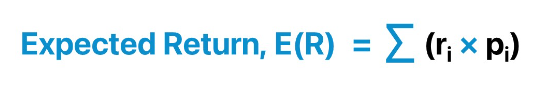

In [ ]:
class MarkowitzOptimizer(object):
    def __init__(self, returns):
        self.return_data = return_data  # The returns dataframe
        self.μ = returns.mean()  # Mean return for each company
        self.Σ = returns.cov()  # Covariance Matrix for each company
        self.n_assets = self.return_data.shape[1]  # Number of assests we have

    def get_optimal_results(self):
        '''
        Returns the optimal weights, expected return and risk corresponding to the return series
        '''
        weights = cp.Variable(self.n_assets)  # The variables
        portfolio_risk = cp.quad_form(weights, self.Σ)  # Associated risks

        # The goal is to minimize the following portfolio risk
        objective = cp.Minimize(portfolio_risk)
        # Which are subjected to the following constraints
        constraints = [cp.sum(weights) == 1, weights >= 0, weights <= 1]

        # Solving the optimization problem
        problem = cp.Problem(objective, constraints)
        problem.solve()

        optimal_weights = weights.value  # These are the optimal weights

        # Get the corresponding portfolio optimal return and risk
        optimal_portfolio_return = self.μ.dot(optimal_weights)
        optimal_portfolio_risk = np.sqrt(portfolio_risk.value)
        self.portfolio_risk = portfolio_risk

        return optimal_weights, optimal_portfolio_return, optimal_portfolio_risk, weights


    def plot_efficient_frontier(self, n_points=500):
        '''
        This method will plot the efficient frontier with number of scatter points = n_points
        '''
        returns = np.linspace(self.μ.min(), self.μ.max(), n_points)
        self.returns = np.array(returns)

        optimal_weights, optimal_portfolio_return, optimal_portfolio_risk, weights = self.get_optimal_results()
        risks = []
        all_weights = []
        for return_ in returns:

            # Defining the constraints for a given target return
            constraints = [
                cp.sum(weights) == 1,
                weights >= 0,
                weights <= 1,
                cp.sum(cp.multiply(self.μ, weights)) == return_
            ]

            # Solving the optimization problem
            problem = cp.Problem(cp.Minimize(self.portfolio_risk), constraints)
            problem.solve()

            risk = np.sqrt(self.portfolio_risk.value)
            risks.append(risk)
            all_weights.append(str(list(weights.value)))

        efficient_frontier_data = pd.DataFrame({'Risk': risks, 'Return': returns, 'Weights': all_weights})
        self.all_weights = [weights.replace('-', '') for weights in np.array(all_weights)]

        # Plotting the efficient Frontier
        fig = px.scatter(
            efficient_frontier_data,
            x='Risk',
            y='Return',
            title='Markowitz Efficient Frontier',
            labels={'Risk': 'Portfolio Risk', 'Return': 'Portfolio Return'},
            hover_data={'Risk': True, 'Return': True, 'Weights': True},
            height=500,
            width=1000
        )
        fig.update_layout(
            hoverlabel=dict(
                font_size=8
            )
        )

        optimal_point = go.Scatter(
            x=[optimal_portfolio_risk],
            y=[optimal_portfolio_return],
            mode='markers',
            marker=dict(color='purple', size=12, symbol='star'),
            name='Global Minimum Risk',
            hoverinfo='text',
            text=['Optimal Risk: {:.4f}'.format(optimal_portfolio_risk) + ' & Optimal Return: {:.4f}'.format(optimal_portfolio_return)]
        )

        fig.update_traces(marker=dict(color='cornflowerblue'))
        fig.add_trace(optimal_point)

        self.risks = np.array(risks)
        return fig

    def plot_upper_half(self, n_points=100):
        '''
        This method will plot the efficient frontier(upper half only) with number of scatter points = n_points
        '''
        optimal_weights, optimal_portfolio_return, optimal_portfolio_risk, weights = self.get_optimal_results()
        returns = np.linspace(optimal_portfolio_return, self.μ.max(), n_points)
        self.returns_upper_half = np.array(returns)


        risks = []
        all_weights = []
        for return_ in returns:

            # Defining the constraints for a given target return
            constraints = [
                cp.sum(weights) == 1,
                weights >= 0,
                weights <= 1,
                cp.sum(cp.multiply(self.μ, weights)) == return_
            ]

            # Solving the optimization problem
            problem = cp.Problem(cp.Minimize(self.portfolio_risk), constraints)
            problem.solve()

            risk = np.sqrt(self.portfolio_risk.value)
            risks.append(risk)
            all_weights.append(str(list(weights.value)))

        efficient_frontier_data = pd.DataFrame({'Risk': risks, 'Return': returns, 'Weights': all_weights})
        # self.all_weights_upper_half = np.array(all_weights)
        self.all_weights_upper_half = [weights.replace('-', '') for weights in np.array(all_weights)]

        # Plotting the efficient Frontier
        fig = px.scatter(
            efficient_frontier_data,
            x='Risk',
            y='Return',
            title='Markowitz Efficient Frontier',
            labels={'Risk': 'Portfolio Risk', 'Return': 'Portfolio Return'},
            hover_data={'Risk': True, 'Return': True, 'Weights': True},
            height=500,
            width=1000
        )
        fig.update_layout(
            hoverlabel=dict(
                font_size=8
            )
        )

        optimal_point = go.Scatter(
            x=[optimal_portfolio_risk],
            y=[optimal_portfolio_return],
            mode='markers',
            marker=dict(color='purple', size=12, symbol='star'),
            name='Global Minimum Risk',
            hoverinfo='text',
            text=['Optimal Risk: {:.4f}'.format(optimal_portfolio_risk) + ' & Optimal Return: {:.4f}'.format(optimal_portfolio_return)]
        )

        fig.update_traces(marker=dict(color='cornflowerblue'))
        fig.add_trace(optimal_point)

        self.risks_upper_half = np.array(risks)
        return fig

    def plot_efficient_frontier_with_selected_points(self, n_points=500, risk_tolerance1=None, risk_tolerance2=None):
        fig = self.plot_upper_half()
        if risk_tolerance1 is not None:
            # Find the index of the closest value to the specified risk tolerance level 1
            index1 = np.argmin(np.abs(self.risks_upper_half - risk_tolerance1))
            risk1 = self.risks_upper_half[index1]
            return1 = self.returns_upper_half[index1]
            weights1 = self.all_weights_upper_half[index1]

            # Highlight the first risk tolerance level point with a different color
            fig.add_trace(go.Scatter(
                x=[risk1],
                y=[return1],
                mode='markers',
                marker=dict(color='green', size=12, symbol='star'),
                name=f'Risk Tolerance 1 ({risk_tolerance1})',
                hoverinfo='text',
                text=[f'Risk: {risk1:.4f} & Return: {return1:.4f}', f'Weights: {weights1}']
            ))

        if risk_tolerance2 is not None:
            # Find the index of the closest value to the specified risk tolerance level 2
            index2 = np.argmin(np.abs(self.risks_upper_half - risk_tolerance2))
            risk2 = self.risks_upper_half[index2]
            return2 = self.returns_upper_half[index2]
            weights2 = self.all_weights_upper_half[index2]

            # Highlight the second risk tolerance level point with a different color
            fig.add_trace(go.Scatter(
                x=[risk2],
                y=[return2],
                mode='markers',
                marker=dict(color='black', size=12, symbol='star'),
                name=f'Risk Tolerance 2 ({risk_tolerance2})',
                hoverinfo='text',
                text=[f'Risk: {risk2:.4f} & Return: {return2:.4f}', f'Weights: {weights2}']
            ))

        return fig, weights1, weights2

    def plot_points_wrt_expected_return(self, n_points=500, expected_return1=None, expected_return2=None):
        fig = self.plot_upper_half()
        if expected_return1 is not None:
            # Find the index of the closest value to the specified risk tolerance level 1
            index1 = np.argmin(np.abs(self.returns_upper_half - expected_return1))
            risk1 = self.risks_upper_half[index1]
            return1 = self.returns_upper_half[index1]
            weights1 = self.all_weights_upper_half[index1]

            # Highlight the first risk tolerance level point with a different color
            fig.add_trace(go.Scatter(
                x=[risk1],
                y=[return1],
                mode='markers',
                marker=dict(color='green', size=12, symbol='star'),
                name=f'Return 1 ({expected_return1})',
                hoverinfo='text',
                text=[f'Risk: {risk1:.4f} & Return: {return1:.4f}', f'Weights: {weights1}']
            ))

        if expected_return2 is not None:
            # Find the index of the closest value to the specified risk tolerance level 2
            index2 = np.argmin(np.abs(self.returns_upper_half - expected_return2))
            risk2 = self.risks_upper_half[index2]
            return2 = self.returns_upper_half[index2]
            weights2 = self.all_weights_upper_half[index2]

            # Highlight the second risk tolerance level point with a different color
            fig.add_trace(go.Scatter(
                x=[risk2],
                y=[return2],
                mode='markers',
                marker=dict(color='black', size=12, symbol='star'),
                name=f'Return 2 ({expected_return2})',
                hoverinfo='text',
                text=[f'Risk: {risk2:.4f} & Return: {return2:.4f}', f'Weights: {weights2}']
            ))

        return fig, weights1, weights2

In [ ]:
opt = MarkowitzOptimizer(return_data)

In [ ]:
fig = opt.plot_efficient_frontier(n_points=100)
fig.show()

### Choosing just the upper half of the curve

In [ ]:
fig = opt.plot_upper_half()
fig.show()

# Choosing 2 points on the efficient frontier and get the corresponding weights

In [ ]:
fig, weights1, weights2 = opt.plot_efficient_frontier_with_selected_points(risk_tolerance1=0.013, risk_tolerance2=0.018)
fig.show()

### Displaying the weights of the 2 choosen points

In [ ]:
weights1 = pd.Series(index=return_data.columns, data=ast.literal_eval(weights1))
weights2 = pd.Series(index=return_data.columns, data=ast.literal_eval(weights2))

In [ ]:
print(f'Weights for point 1: \n{weights1}\n\n')
print(f'Weights for point 2: \n{weights2}')

Weights for point 1: 
Apple_Return        5.819236e+19
Google_Return       1.964903e+19
Microsoft_Return    1.194738e+19
Amazon_Return       6.350059e+21
Tesla_Return        1.636694e+18
Meta_Return         1.474758e-01
NVIDIA_Return       4.337061e-01
PayPal_Return       8.523809e-02
Netflix_Return      2.468052e-01
Visa_Return         8.677482e-02
dtype: float64


Weights for point 2: 
Apple_Return        7.210129e+22
Google_Return       4.551736e+22
Microsoft_Return    5.286334e+22
Amazon_Return       5.405382e+22
Tesla_Return        1.126901e+21
Meta_Return         2.972940e+22
NVIDIA_Return       9.306920e-01
PayPal_Return       3.769080e+22
Netflix_Return      6.930805e-02
Visa_Return         6.180119e+22
dtype: float64


# Additional Part: Get the Global Minimum Risk wrt desired return one wants

In [ ]:
fig, weights1, weights2 = opt.plot_points_wrt_expected_return(expected_return1=0.0032, expected_return2=0.0060)
fig.show()

In [ ]:
weights1 = pd.Series(index=return_data.columns, data=ast.literal_eval(weights1))
weights2 = pd.Series(index=return_data.columns, data=ast.literal_eval(weights2))

In [ ]:
print(f'Weights for point 1: \n{weights1}\n\n')
print(f'Weights for point 2: \n{weights2}')

Weights for point 1: 
Apple_Return        8.124303e+18
Google_Return       9.756952e-02
Microsoft_Return    1.546532e-02
Amazon_Return       8.133229e+18
Tesla_Return        4.250821e+17
Meta_Return         1.089273e-01
NVIDIA_Return       5.703960e-02
PayPal_Return       1.674530e-02
Netflix_Return      7.227098e-02
Visa_Return         6.319820e-01
dtype: float64


Weights for point 2: 
Apple_Return        3.453580e+19
Google_Return       2.774395e+19
Microsoft_Return    2.909361e+19
Amazon_Return       2.870981e+19
Tesla_Return        3.974896e+19
Meta_Return         7.110297e-02
NVIDIA_Return       5.592939e-01
PayPal_Return       8.692415e-02
Netflix_Return      2.826790e-01
Visa_Return         2.774750e+19
dtype: float64
